# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd

# Import the titanic dataset here

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
#filter dataset by passengers 
df_titanic = df_titanic.dropna(subset = ["fare"])
passengers = df_titanic[(df_titanic["class"].isin(["1st", "2nd", "3rd"]))]

#calculate joint distribution
distributions = pd.crosstab(passengers["class"], passengers["embarked"], margins = True)
distributions

embarked,C,Q,S,All
class,,,,
1st,142,3,172,317
2nd,26,7,237,270
3rd,102,113,489,704
All,270,123,898,1291


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [3]:
# conditional distribution given where they embarked
class_probs = passengers.groupby("embarked")["class"].value_counts(normalize = True) 
class_probs

print("The conditional distribution of their class given where they embarked is:")
print(class_probs)

embarked_probs = passengers.groupby("class")["embarked"].value_counts(normalize = True) 
embarked_probs

print("the conditional distribution of where they embarked given their class is: ")
print(embarked_probs)

print("The proportion of 3rd class passengers embarked at Southampton is: 69.68%")

print("The proportion of Southampton passengers were in 3rd class is: 54.05%")

The conditional distribution of their class given where they embarked is:
embarked  class
C         1st      0.525926
          3rd      0.377778
          2nd      0.096296
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.544543
          2nd      0.263920
          1st      0.191537
Name: proportion, dtype: float64
the conditional distribution of where they embarked given their class is: 
class  embarked
1st    S           0.542587
       C           0.447950
       Q           0.009464
2nd    S           0.877778
       C           0.096296
       Q           0.025926
3rd    S           0.694602
       Q           0.160511
       C           0.144886
Name: proportion, dtype: float64
The proportion of 3rd class passengers embarked at Southampton is: 69.68%
The proportion of Southampton passengers were in 3rd class is: 54.05%
The conditional distribution of their class given where they embarked is:
embarked  class
C         1st  

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

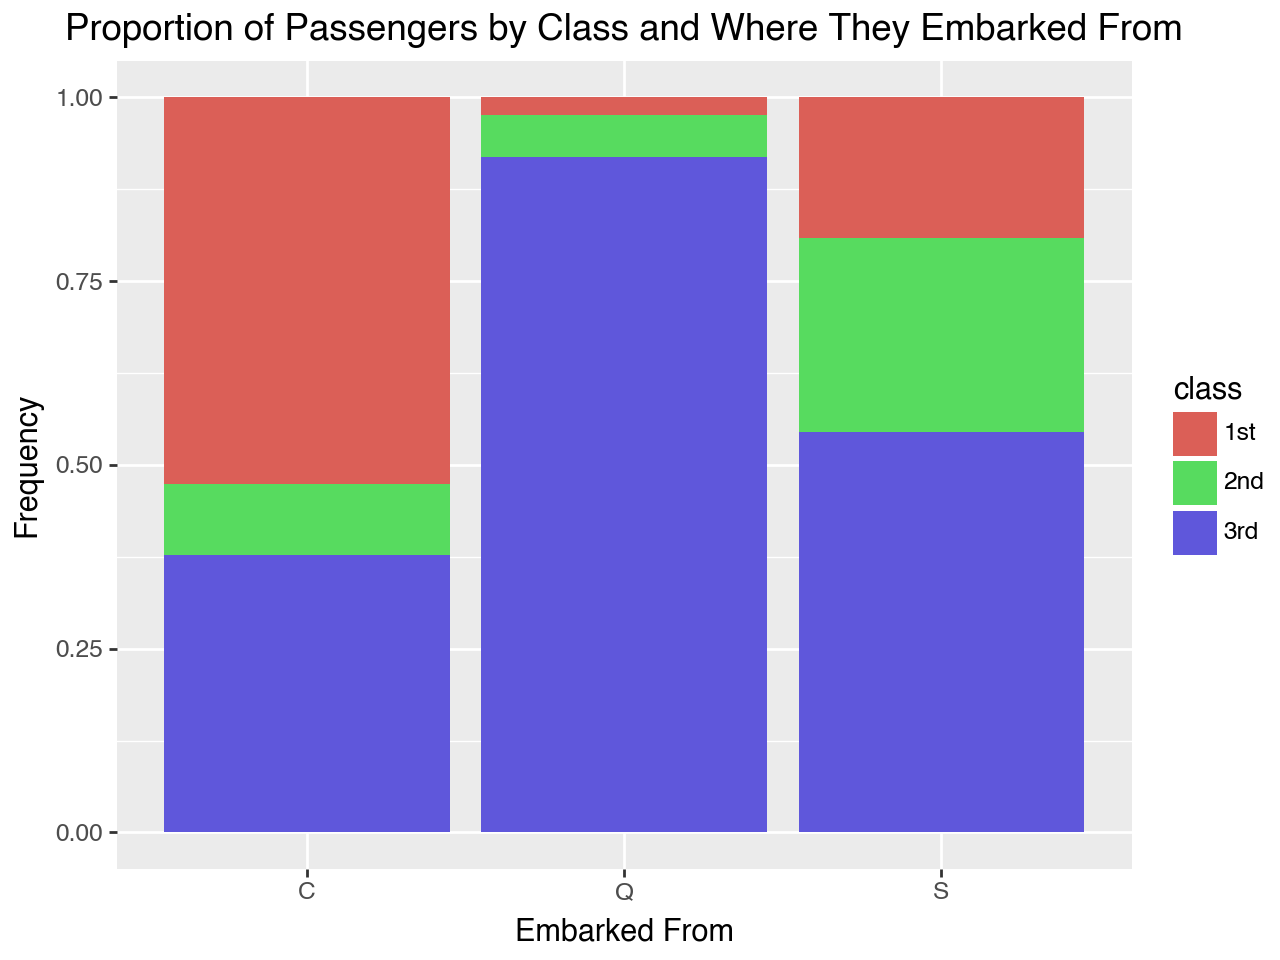

In [4]:
# Code here
from plotnine import *

(ggplot(passengers,
aes(x = "embarked", fill = "class"))
+ geom_bar(position = "fill")
+ labs(x = "Embarked From", y = "Frequency", 
        title = "Proportion of Passengers by Class and Where They Embarked From")
)